In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


# Student Performance (Multiple Linear Regression)
- In our notebook we will useing the 'Multiple Linear Reagression' to haveing more knowledge about it

![](https://miro.medium.com/v2/resize:fit:1200/1*a3HFulvxQQM32dHOY_Dtqw.jpeg)

- Like a first step we must import our librarys 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 1.Export Data
- Here we need to export the data from CSV and checked it 

In [3]:
df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


- After we are export the data we haveing 10000 rows and 6 columns
- To haveing a knowleged about data we must have information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


- So here we see there is one column is object and we will not useing it now 
- We will useing the outher columns to makeing our 'Multiple Linear Regression'
- Any way we will makeing Data Cleaning

## 2.Data Cleaning

In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.duplicated().sum()

127

In [7]:
df.dropna(inplace=True)

In [8]:
df.drop_duplicates(inplace=True)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


## 3.Outliers
- If we have a data is outliers or no

<Axes: >

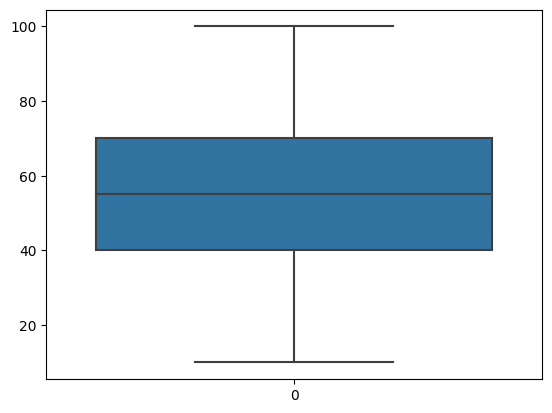

In [9]:
sns.boxplot(df['Performance Index'])

- To check anouther column if there are outlires or no

<Axes: >

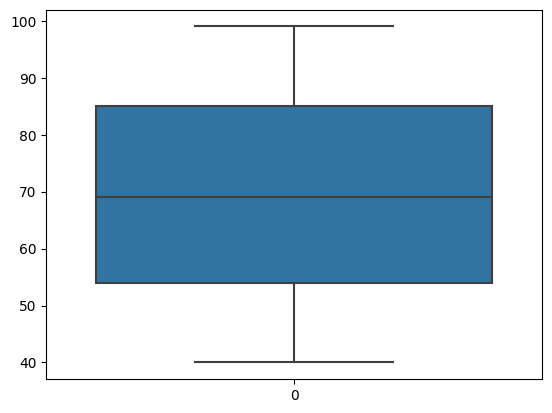

In [10]:
sns.boxplot(df['Previous Scores'])

- After we are checking if there are a values outliers or no we find there are not any values in outliers, so...
- Ok after we makeing cleaning to our data we will makeing an 'EDA' to our data

## 4.EDA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

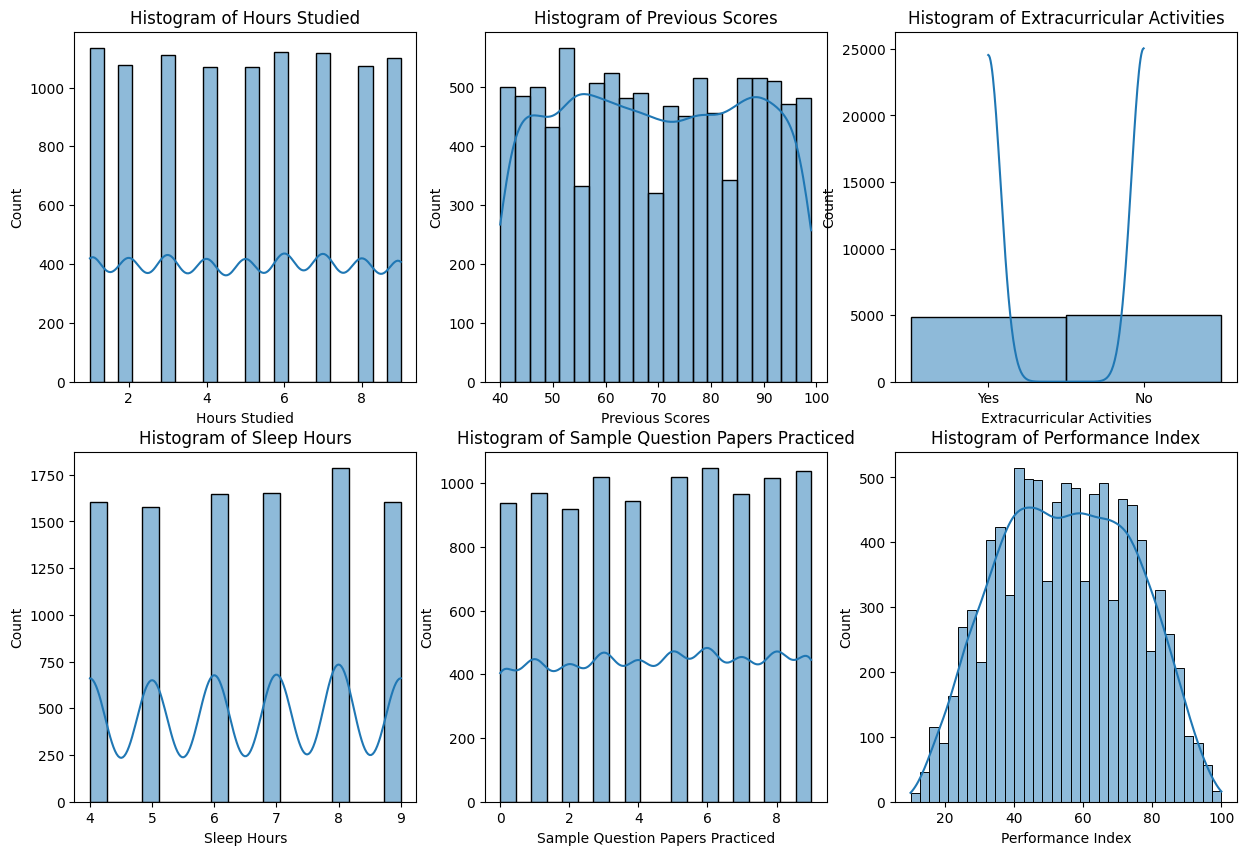

In [11]:
num_variables = ['Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced','Performance Index'] 
plt.figure(figsize=(15,10))
for i,var in enumerate(num_variables):
    plt.subplot(2, 3,i + 1)
    sns.histplot(df[var],kde=True)
    plt.title(f'Histogram of {var}')

plt.show()

In [12]:
fig = px.scatter(df, x='Hours Studied', y='Sleep Hours', 
                 title='Scatter Plot of Hours Studied vs Sleep Hours',
                 labels={'Hours Studied':'Hours Studied', 'Sleep Hours':'Sleep Hours'},
                 size='Previous Scores',
                 hover_data=['Performance Index', 'Extracurricular Activities']) 

fig.show()

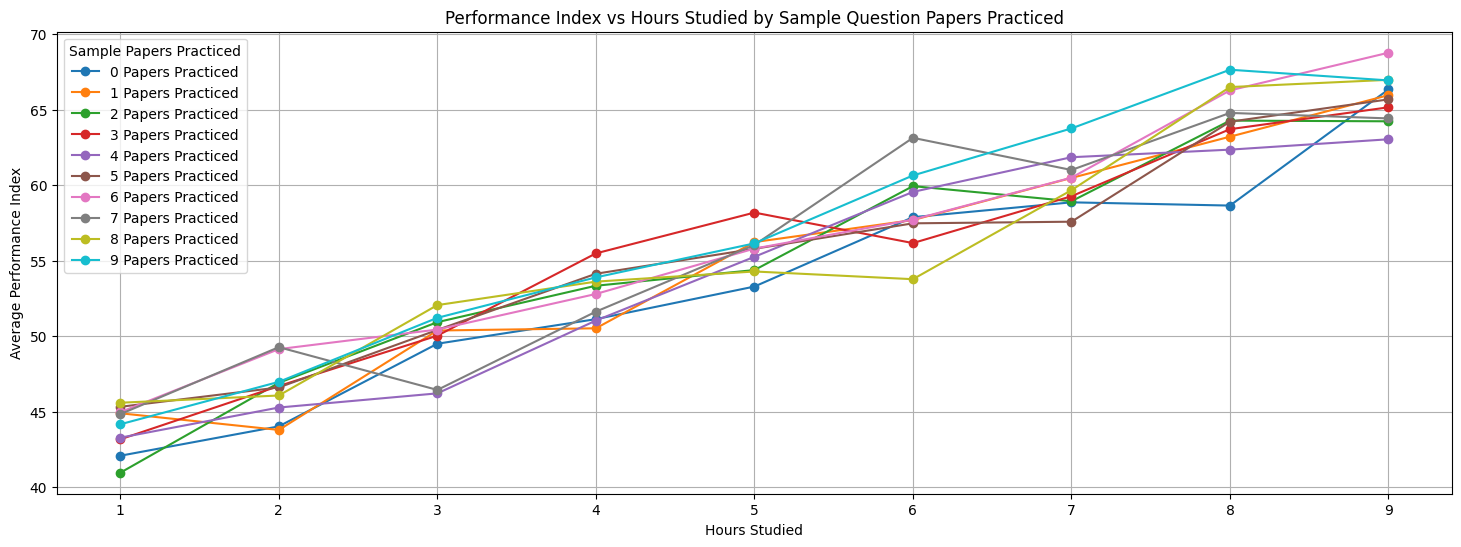

In [13]:
grouped_df = df.groupby(['Hours Studied', 'Sample Question Papers Practiced'])['Performance Index'].mean().reset_index()

plt.figure(figsize=(18, 6))

for papers in grouped_df['Sample Question Papers Practiced'].unique():
    subset = grouped_df[grouped_df['Sample Question Papers Practiced'] == papers]
    plt.plot(subset['Hours Studied'], subset['Performance Index'], marker='o', label=f'{papers} Papers Practiced')

plt.title('Performance Index vs Hours Studied by Sample Question Papers Practiced')
plt.xlabel('Hours Studied')
plt.ylabel('Average Performance Index')
plt.xticks(range(df['Hours Studied'].min(), df['Hours Studied'].max() + 1))
plt.legend(title='Sample Papers Practiced')
plt.grid(True)
plt.show()

## 5.Linear Regression

In [14]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values 

In [15]:
x = df[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']]
y = df['Performance Index']

In [16]:
x

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [17]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 9873, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

In [19]:
model = LinearRegression()
model.fit(X_train,y_train) # to learning the moudel

LinearRegression()

In [20]:
y_pred = model.predict(X_test) # to teasting what it is learning 
y_pred 

array([70.59250124, 69.44376771, 74.90134186, ..., 70.82271873,
       14.56426668, 34.4464728 ])

In [21]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
r2 = r2_score(y_test, y_pred)
r2

0.988092867234579